In [11]:
import supermarq 
from __future__ import annotations
import cirq
#import qiskit
from qiskit.quantum_info import hellinger_fidelity
from supermarq.benchmark import Benchmark
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit.tools.visualization import plot_histogram
#---------------Plain qft code starts--------------------
from concurrent.futures import ThreadPoolExecutor
from qiskit import *
from time import *
import numpy as np

In [12]:
ghz_circuit = supermarq.ghz.GHZ(3).qiskit_circuit()
ghz_circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [16]:
ghz_features = {}
benchmarks = [(ghz_circuit, "ghz3"),]
for benchmark, label in benchmarks:
ghz_features = [
    supermarq.converters.compute_communication_with_qiskit(ghz_circuit),
    supermarq.converters.compute_depth_with_qiskit(ghz_circuit),
    supermarq.converters.compute_entanglement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_liveness_with_qiskit(ghz_circuit),
    supermarq.converters.compute_measurement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_parallelism_with_qiskit(ghz_circuit),
]
print(ghz_features)

[0.6666666666666666, 1.0, 0.6666666666666666, 0.5555555555555556, 0.0, 0.0]


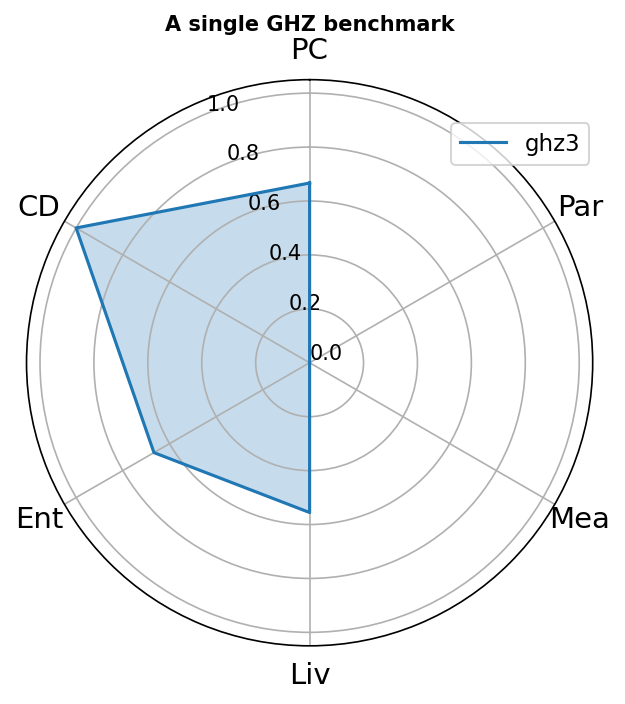

In [17]:
supermarq.plotting.plot_benchmark(
    ["A single GHZ benchmark", ["ghz3"], [ghz_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

In [15]:
benchmark_features = {}
benchmarks = [(supermarq.ghz.GHZ(3), "ghz3"),]
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),
    ]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0]}


In [16]:
emulator = Aer.get_backend('aer_simulator_statevector')
job = execute(transpile(ghz_circuit, emulator), emulator, shots=8192, memory=True)
job

In [17]:
data=job.result()
data

Result(backend_name='aer_simulator', backend_version='0.13.0', qobj_id='', job_id='c9fee0cc-5660-443d-aea5-7e1a038fc829', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=10, name='circuit-175', qreg_sizes=[['q', 10]], metadata={}), status=DONE, seed_simulator=3867813606, metadata={'time_taken': 2.1937e-05, 'num_bind_params': 1, 'required_memory_mb': 1, 'input_qubit_map': [], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 0, 'parallel_state_update': 24, 'active_input_qubits': [], 'num_clbits': 0, 'remapped_qubits': False, 'parallel_shots': 1, 'runtime_parameter_bind': False, 'max_memory_mb': 63964, 'measure_sampling': False, 'batched_shots_optimization': False}, time_taken=2.1937e-05)], date=2024-06-19T17:20:24.783112, status=COMPLETED, header=None, metadata={'time_taken_parameter_binding': 5.195e-06, 'time_taken_execute': 3.9643e-05

In [18]:
counts = job.result().get_counts()
print(counts)

QiskitError: 'No counts for experiment "0"'

In [ ]:
jobs = []
backend = Aer.get_backend('aer_simulator_statevector')
for benchmark, label in benchmarks:
    job = backend.run(benchmark.ghz_circuit(), shots=1000)
    jobs.append((label, job, benchmark))
ghz_circuit